In [1]:
import os
import pdb
import sys
import torch
import cv2
import numpy as np
from skimage import io
from skimage.transform import resize


from PIL import Image, ImageDraw

dir_main = os.path.abspath('/Users/Anish Mukherjee/Desktop/TU Delft/Q3/Deep Learning/Project/CS4180-DL/')
sys.path.append(dir_main)
print (' - In Path : ', sys.path[-1])

from src.nets2_utils import *
from src.nets import Darknet
from src.nets import *

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

 - In Path :  C:\Users\Anish Mukherjee\Desktop\TU Delft\Q3\Deep Learning\Project\CS4180-DL\
 - Online Runtime


In [2]:
def load_model(cfgfile, weightfile):
    m = Darknet(cfgfile)
    m.load_weights(weightfile)
    use_cuda = 1
    if use_cuda:
        m.cuda()
    return m

if __name__ == '__main__':
    
        dir_main = os.path.abspath('/Users/Anish Mukherjee/Desktop/TU Delft/Q3/Deep Learning/Project/CS4180-DL/')
        sys.path.append(dir_main)
        print (' - In Path : ', sys.path[-1])
        cfgfile = os.path.join(dir_main, 'data\\cfg\\github_pjreddie\\yolov2-voc.cfg')
        
        weightfiles = ['yolov2-voc.weights', 'filter-pruned-20.0-retrained_000005.weights']
        
        models = []
        for weightfile_name in weightfiles:  
            weightfile_path = os.path.join(dir_main, 'data\\weights\\{0}'.format(weightfile_name))
            models.append(load_model(cfgfile, weightfile_path))
        

 - In Path :  C:\Users\Anish Mukherjee\Desktop\TU Delft\Q3\Deep Learning\Project\CS4180-DL\
  -- [DEBUG] Non-BN Block :  {'type': 'convolutional', 'batch_normalize': 0, 'size': '1', 'stride': '1', 'pad': '1', 'filters': '125', 'activation': 'linear'}
  -- [DEBUG][Darknet] self.anchors :  [1.3221, 1.73145, 3.19275, 4.00944, 5.05587, 8.09892, 9.47112, 4.84053, 11.2364, 10.0071]
  -- [DEBUG][Darknet] self.num_anchors :  5
  -- [DEBUG][Darknet] self.anchor_step :  2.0
  -- [DEBUG][Darknet] self.num_classes :  20
  -- [DEBUG][Darknet] self.loss :  RegionLoss()
  -- [DEBUG] Non-BN Block :  {'type': 'convolutional', 'batch_normalize': 0, 'size': '1', 'stride': '1', 'pad': '1', 'filters': '125', 'activation': 'linear'}
  -- [DEBUG][Darknet] self.anchors :  [1.3221, 1.73145, 3.19275, 4.00944, 5.05587, 8.09892, 9.47112, 4.84053, 11.2364, 10.0071]
  -- [DEBUG][Darknet] self.num_anchors :  5
  -- [DEBUG][Darknet] self.anchor_step :  2.0
  -- [DEBUG][Darknet] self.num_classes :  20
  -- [DEBUG][Dar

)]


 - imgfile :  C:\Users\Anish Mukherjee\Desktop\TU Delft\Q3\Deep Learning\Project\CS4180-DL\data\VOCdevkit_test\VOC2007\JPEGImages\002463.jpg
 - imgfile :  C:\Users\Anish Mukherjee\Desktop\TU Delft\Q3\Deep Learning\Project\CS4180-DL\data\VOCdevkit_test\VOC2007\JPEGImages\004053.jpg
 - imgfile :  C:\Users\Anish Mukherjee\Desktop\TU Delft\Q3\Deep Learning\Project\CS4180-DL\data\VOCdevkit_test\VOC2007\JPEGImages\000094.jpg
 - imgfile :  C:\Users\Anish Mukherjee\Desktop\TU Delft\Q3\Deep Learning\Project\CS4180-DL\data\VOCdevkit_test\VOC2007\JPEGImages\001668.jpg


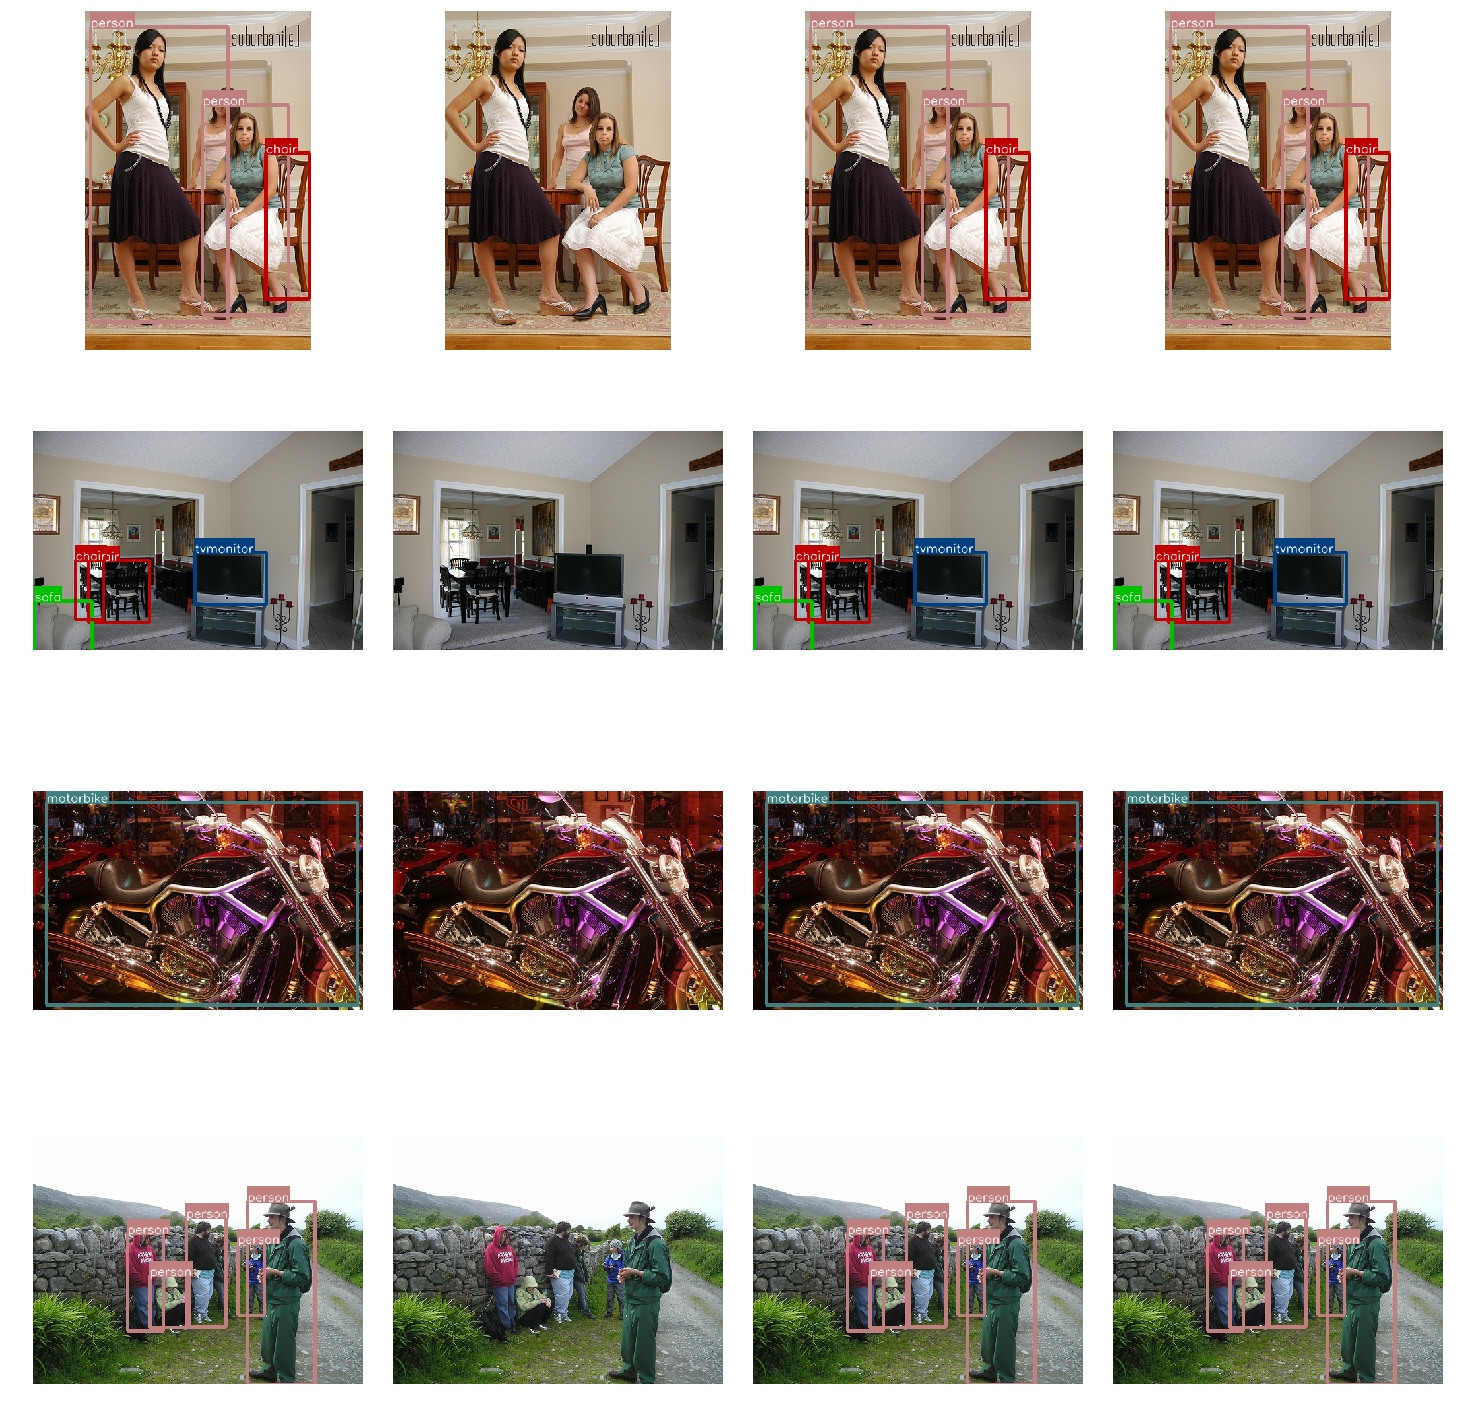

In [56]:
from src.nets2_utils import *

def detect_skimage(m, imgfile, verbose=0):
    class_names = ['aeroplane', 'bicycle','bird','boat','bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable','dog','horse','motorbike','person','pottedplant','sheep','sofa','train', 'tvmonitor' ] 

    img = io.imread(imgfile)
    sized = resize(img, (m.width, m.height)) * 255
    
    for i in range(1):
        start = time.time()
        boxes = do_detect(m, sized, 0.5, 0.4, 1, verbose=verbose)
        finish = time.time()
        #if i == 1:
        #    print('%s: Predicted in %f seconds.' % (imgfile, (finish-start)))

    img_preds = plot_boxes_cv2(img, boxes, savename='predictions.jpg', class_names=class_names, verbose=verbose)
    return img_preds
    
if __name__ == "__main__":
    dir_img    = os.path.join(dir_main, 'data\\VOCdevkit_test\\VOC2007\\JPEGImages')
    dir_files  = os.listdir(dir_img)
    test_count = 4
    file_ids   = np.random.choice(len(dir_files), test_count)
    
    f,axarr = plt.subplots(len(file_ids), len(models), figsize=(20,20))
    # plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    f.tight_layout(pad=0.0)
    fileids_str = ''
    for i_file, file_id in enumerate(file_ids):
        imgfile   = os.path.join(dir_img, dir_files[file_id])
        # imgfile   = os.path.join(dir_img, '003545.jpg')
        print (' - imgfile : ', imgfile)
        fileids_str += str(file_id) + '_'
        for i_model, model in enumerate(models):
            img = detect_skimage(model, imgfile, verbose=0)
            axarr[i_file][i_model].imshow(img)
            axarr[i_file][i_model].axis('off')
            axarr[i_file][i_model].set_aspect('equal')
    
    final_name = 'predictions_' + fileids_str + '.png'
    # plt.subplots_adjust(wspace=0.1, hspace=0)
    plt.savefig(final_name, bbox_inches = 'tight',pad_inches = 0, format='png', dpi = 100)

AttributeError: 'numpy.ndarray' object has no attribute 'axis'

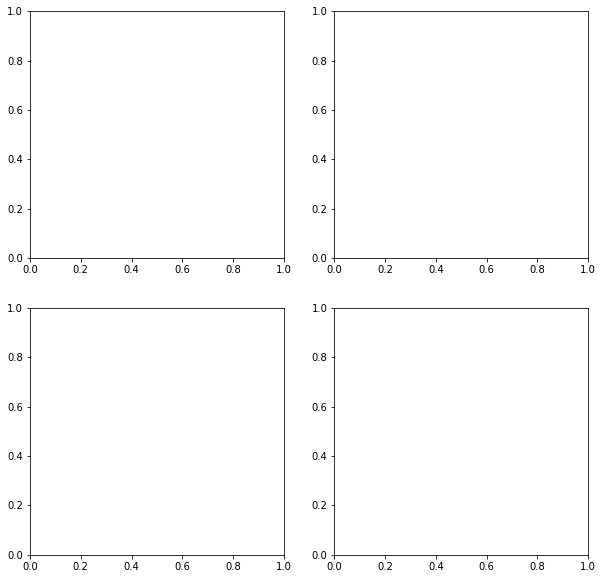

In [52]:
import matplotlib.pyplot as plt

# ax = [plt.subplot(2,2,i+1) for i in range(4)]
f,axarr = plt.subplots(2,2, figsize=(10,10))
for a in axarr:
    a.axis('off')
#     a.set_xticklabels([])
#     a.set_yticklabels([])

plt.subplots_adjust(wspace=0, hspace=0)